In [1]:
# import libraries

import pandas as pd


import numpy as np

import warnings
warnings.filterwarnings ('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import seaborn as sns

import matplotlib.pyplot as plt

from geopy.geocoders import Nominatim

In [2]:
data_prior3_ori = pd.read_csv('../Proyecto_Arraigo_Recomender_System/data/Urbanitas_prior3.csv')


data_prior3 = data_prior3_ori.copy()

In [3]:
data_prior3.shape

(10618, 24)

In [4]:
data_prior3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10618 entries, 0 to 10617
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Unnamed: 0                          10618 non-null  int64 
 1   id                                  10618 non-null  object
 2   fecha                               10618 non-null  object
 3   pais_de_residencia                  10590 non-null  object
 4   provincia_de_espana                 10618 non-null  object
 5   ciudad_residencia                   10590 non-null  object
 6   situacion_en_espana                 10571 non-null  object
 7   profesion                           10515 non-null  object
 8   autonomia_economica                 8407 non-null   object
 9   familia_edades                      8964 non-null   object
 10  coche_propio                        10618 non-null  object
 11  carnet_coche                        10618 non-null  ob

In [5]:
porcentaje_nulos = data_prior3.isnull().sum() / data_prior3.count() * 100
porcentaje_nulos.sort_values(ascending=False)

autonomia_economica                   26.299512
familia_edades                        18.451584
profesion                              0.979553
primera_segunda_vivienda               0.587344
situacion_en_espana                    0.444613
presupuesto_alquiler                   0.387634
pais_de_residencia                     0.264400
ciudad_residencia                      0.264400
Unnamed: 0                             0.000000
predisposicion_pueblo                  0.000000
sector_otros                           0.000000
sector_agricultura_ganaderia_pesca     0.000000
sector_construccion                    0.000000
sector_industria                       0.000000
sector_servicios                       0.000000
numero_familiares                      0.000000
mascota                                0.000000
zona_interes                           0.000000
id                                     0.000000
carnet_coche                           0.000000
coche_propio                           0

BORRADO DE COLUMNAS INCONSISTENTES/IRRELEVANTES

In [6]:
data_prior3 = data_prior3.drop(labels=["Unnamed: 0",
                                       'id',
                                       'nan_filas',
                                       'profesion',
                                       'familia_edades',
                                      'ciudad_residencia'],
                                        axis=1)


In [7]:
data_prior3.head(1)

,fecha,pais_de_residencia,provincia_de_espana,situacion_en_espana,autonomia_economica,coche_propio,carnet_coche,mascota,presupuesto_alquiler,primera_segunda_vivienda,zona_interes,predisposicion_pueblo,numero_familiares,sector_servicios,sector_industria,sector_construccion,sector_agricultura_ganaderia_pesca,sector_otros
0,2023-03-01,España,Cantabria,Tengo nacionalidad española / de un país de la...,NaN,No,Si,No,NaN,NaN,Indiferente,Aún me lo estoy pensando,3,0,0,0,0,0


In [8]:
mask = data_prior3.apply(lambda row: row.astype(str).str.contains('\?').any(), axis=1)
result = data_prior3.loc[mask]

result

,fecha,pais_de_residencia,provincia_de_espana,situacion_en_espana,autonomia_economica,coche_propio,carnet_coche,mascota,presupuesto_alquiler,primera_segunda_vivienda,zona_interes,predisposicion_pueblo,numero_familiares,sector_servicios,sector_industria,sector_construccion,sector_agricultura_ganaderia_pesca,sector_otros
72,2020-12-07,Latino América,Ninguna,No estoy en ninguna de esas situaciones,6 meses,Si,Si,No,Hasta 300€,Primera residencia,? ?????????,1 mes,2,0,0,0,0,1
5290,2021-11-04,Otro,Ninguna,No estoy en ninguna de esas situaciones,???? ?? ???,Si,Si,Si,Hasta 300€,Primera residencia,??? ????,Aún me lo estoy pensando,3,0,0,0,0,1
5847,2022-01-01,Otro,Ninguna,No estoy en ninguna de esas situaciones,3 meses,Si,Si,No,Hasta 300€,Primera residencia,? ?????????,1 mes,6,0,0,0,0,0
9314,2022-09-09,Otro,Ninguna,No estoy en ninguna de esas situaciones,NaN,Si,Si,Si,Hasta 300€,Primera residencia,?????? ????????,1 mes,3,0,0,0,0,1
10256,2022-12-26,España,????????,Tengo nacionalidad española / de un país de la...,NaN,Si,Si,No,Hasta 300€,Primera residencia,Indiferente,6 meses,2,0,0,0,0,0


In [9]:
data_prior3 = data_prior3.drop(result.index)

BORRADO DE NULOS (SALVO AUTONOMÍA ECONÓMICA)

In [10]:
data_prior3 = data_prior3.dropna(subset=[col for col in data_prior3.columns if col != 'autonomia_economica'])

CONVERSIÓN DE TODAS LAS COLUMNAS CATEGÓRICAS A NUMÉRICAS

In [11]:
#Empezaremos por las columnas más sencillas, pasándolas a booleano (éxito, no éxito).

In [12]:
data_prior3['carnet_coche']= data_prior3.carnet_coche.replace('Si', 1).replace('No', 0).astype(int)

In [13]:
data_prior3['coche_propio']= data_prior3.coche_propio.replace('Si', 1).replace('No', 0).astype(int)

In [14]:
data_prior3['mascota'] = data_prior3.mascota.replace('Si', 1).replace('No', 0).astype(int)

In [15]:
data_prior3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10449 entries, 1 to 10617
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   fecha                               10449 non-null  object
 1   pais_de_residencia                  10449 non-null  object
 2   provincia_de_espana                 10449 non-null  object
 3   situacion_en_espana                 10449 non-null  object
 4   autonomia_economica                 8313 non-null   object
 5   coche_propio                        10449 non-null  int32 
 6   carnet_coche                        10449 non-null  int32 
 7   mascota                             10449 non-null  int32 
 8   presupuesto_alquiler                10449 non-null  object
 9   primera_segunda_vivienda            10449 non-null  object
 10  zona_interes                        10449 non-null  object
 11  predisposicion_pueblo               10449 non-null  ob

In [16]:
data_prior3.predisposicion_pueblo .unique() #en cuanto tiempo estarían preparados para mudarse a un pueblo

array(['3 meses', 'Aún me lo estoy pensando', '6 meses', '1 mes'],
      dtype=object)

In [17]:
data_prior3 = pd.get_dummies(data_prior3, columns=['predisposicion_pueblo'])

In [18]:
data_prior3.shape

(10449, 21)

In [19]:
#Columna de fecha: como nos puede interesar la estacionalidad de demanda y la tendencia, haremos lo siguiente:

# Convertimos la columna de fecha a tipo datetime
data_prior3['fecha'] = pd.to_datetime(data_prior3['fecha'])

# Creamos nuevas columnas numéricas para el año, mes y día
data_prior3['year'] = data_prior3['fecha'].dt.year
data_prior3['month'] = data_prior3['fecha'].dt.month
data_prior3['day'] = data_prior3['fecha'].dt.day #esta incluso nos la podríamos cargar, pero la dejamos de momento

In [20]:
data_prior3.shape

(10449, 24)

In [21]:
#columna pais_de_residencia

data_prior3.pais_de_residencia.unique()

array(['España', 'Latino América', 'Otro',
       'Resto de Europa (dentro de UE)'], dtype=object)

In [22]:
data_prior3 = pd.get_dummies(data_prior3, columns=['pais_de_residencia'])

In [23]:
#columna provincia

data_prior3.provincia_de_espana.unique()

array(['Andalucía', 'Madrid', 'Valencia', 'Ninguna', 'Baleares',
       'Navarra', 'Comunitat Valenciana', 'Pontevedra', 'Barcelona',
       'Toledo', 'Alicante', 'Canarias', 'Aragón', 'Extremadura',
       'Euskadi', 'Cataluña', 'Castilla y León', 'Galicia', 'Vizcaya',
       'Sevilla', 'Murcia', 'Cádiz', 'Castilla-La Mancha', 'Cantabria',
       'Región de Murcia', 'Tarragona', 'La Rioja', 'Córdoba', 'A Coruña',
       'Ciudad Real', 'Girona', 'Albacete', 'Castellón', 'Málaga',
       'Cáceres', 'Asturias', 'Guadalajara', 'Plazas de Soberanía',
       'Granada', 'Zaragoza', 'Almería', 'Segovia', 'Huelva',
       'Valladolid', 'Las Palmas', 'León', 'Santa Cruz de Tenerife',
       'Lérida', 'Gipuzkoa', 'Badajoz', 'Huesca', 'Ceuta y Melilla',
       'Cuenca', 'Jaén', 'Salamanca', 'Burgos', 'Lleida', 'Álava',
       'Zamora', 'Palencia', 'Ourense', 'Lugo', 'Ávila', 'Teruel',
       'Soria'], dtype=object)

In [24]:
#como get dummies nos crearía muchas columnas, dividiremos las provincias por 4 regiones de España

prov_norte = ['Galicia', 'Asturias', 'Cantabria', 'País Vasco', 'Navarra', 'La Rioja','Pontevedra','Euskadi','Vizcaya','A Coruña','Gipuzkoa''Ourense', 'Lugo','La Rioja', ]
prov_sur = ['Andalucía','Cádiz','Córdoba','Málaga','Sevilla', 'Granada', 'Almería', 'Huelva', 'Ceuta y Melilla','Canarias','Las Palmas','Santa Cruz de Tenerife']
prov_este = ['Cataluña', 'Baleares','Valencia', 'Murcia','Alicante', 'Comunitat Valenciana','Región de Murcia','Castellón','Lérida','Lleida','Girona','Tarragona', 'Barcelona']
prov_centro = ['Castilla y León', 'Castilla-La Mancha', 'Aragón', 'Toledo','Extremadura', 'Ciudad Real','Albacete','Cáceres','Guadalajara','Zaragoza','Segovia','Valladolid','León','Badajoz', 'Huesca','Cuenca', 'Jaén','Salamanca', 'Burgos','Zamora', 'Palencia','Ávila', 'Teruel','Soria']
prov_madrid = ['Madrid']
prov_fuera_espana = ['Ninguna','Plazas de Soberanía']


In [25]:
data_prior3['prov_norte'] = data_prior3['provincia_de_espana'].apply(lambda x: 1 if x in prov_norte else 0)
data_prior3['prov_sur'] = data_prior3['provincia_de_espana'].apply(lambda x: 1 if x in prov_sur else 0)
data_prior3['prov_este'] = data_prior3['provincia_de_espana'].apply(lambda x: 1 if x in prov_este else 0)
data_prior3['prov_centro'] = data_prior3['provincia_de_espana'].apply(lambda x: 1 if x in prov_centro else 0)
data_prior3['prov_madrid'] = data_prior3['provincia_de_espana'].apply(lambda x: 1 if x in prov_madrid else 0)
data_prior3['prov_fuera_espana'] = data_prior3['provincia_de_espana'].apply(lambda x: 1 if x in prov_fuera_espana else 0)

In [26]:
data_prior3.shape


(10449, 33)

In [27]:
data_prior3.situacion_en_espana.unique()

array(['Tengo nacionalidad española / de un país de la UE / permiso de residencia',
       'No estoy en ninguna de esas situaciones'], dtype=object)

In [28]:
data_prior3 = pd.get_dummies(data_prior3, columns=['situacion_en_espana'])

In [29]:
data_prior3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10449 entries, 1 to 10617
Data columns (total 34 columns):
 #   Column                                                                                         Non-Null Count  Dtype         
---  ------                                                                                         --------------  -----         
 0   fecha                                                                                          10449 non-null  datetime64[ns]
 1   provincia_de_espana                                                                            10449 non-null  object        
 2   autonomia_economica                                                                            8313 non-null   object        
 3   coche_propio                                                                                   10449 non-null  int32         
 4   carnet_coche                                                                                   10449

In [30]:
data_prior3.presupuesto_alquiler.unique()

array(['Hasta 300€', 'Hasta 450€', 'Hasta 600€', 'Más de 600€'],
      dtype=object)

In [31]:
#para esta columna nos interesa jerarquizar a la hora de convertir la columna a numérica, por lo que haremos lo siguiente:

# Crear el diccionario de mapeo
mapeo = {'Hasta 300€': 1,
         'Hasta 450€': 2,
         'Hasta 600€': 3,
         'Más de 600€': 4}

# Aplicar el mapeo a la columna "Costo"
data_prior3['presupuesto_alquiler'] = data_prior3['presupuesto_alquiler'].map(mapeo)

In [32]:
data_prior3.presupuesto_alquiler.unique()

array([1, 2, 3, 4], dtype=int64)

In [33]:
data_prior3.primera_segunda_vivienda.unique()

array(['Primera residencia', 'Segunda residencia'], dtype=object)

In [34]:
data_prior3 = pd.get_dummies(data_prior3, columns=['primera_segunda_vivienda'])

In [35]:
data_prior3.zona_interes.unique()

array(['Pueblos de Zaragoza', 'Sierra norte de Madrid', 'Indiferente',
       'Pueblos de Burgos', 'Pueblos de Soria', 'Pueblos de Jaén',
       'Pueblos de Palencia', 'Pueblos de Galicia',
       'Pueblos de Zaragoza-Huesca', 'Pueblos de Segovia',
       'Pueblos de Cuenca', 'Navarra', 'Pueblos de Zamora',
       'Indiferente, menos de 150km de Madrid'], dtype=object)

In [36]:
data_prior3 = pd.get_dummies(data_prior3, columns=['zona_interes'])

In [37]:
data_prior3.shape

(10449, 48)

In [38]:
data_prior3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10449 entries, 1 to 10617
Data columns (total 48 columns):
 #   Column                                                                                         Non-Null Count  Dtype         
---  ------                                                                                         --------------  -----         
 0   fecha                                                                                          10449 non-null  datetime64[ns]
 1   provincia_de_espana                                                                            10449 non-null  object        
 2   autonomia_economica                                                                            8313 non-null   object        
 3   coche_propio                                                                                   10449 non-null  int32         
 4   carnet_coche                                                                                   10449

In [39]:
#data_prior3['autonomia_economica'] = data_prior3['autonomia_economica'].replace({'3 meses': '3', '6 meses': '6', '1 año': '12', 'Más de 1 año': '14'})

In [40]:
moda = data_prior3.autonomia_economica.mode()[0] #hemos tomado la decisión de tomar el valor de la moda (dado que los solicitantes tienen perfiles parecidos) como método de rellenar los nulos de la columna de autonomía económica

moda #el valor que más se repite es '3' -> 3 meses de autonomía económica

'3 meses'

In [41]:
data_prior3['autonomia_economica'] = data_prior3['autonomia_economica'].fillna(moda)

In [42]:
data_prior3 = pd.get_dummies(data_prior3, columns=['autonomia_economica'])

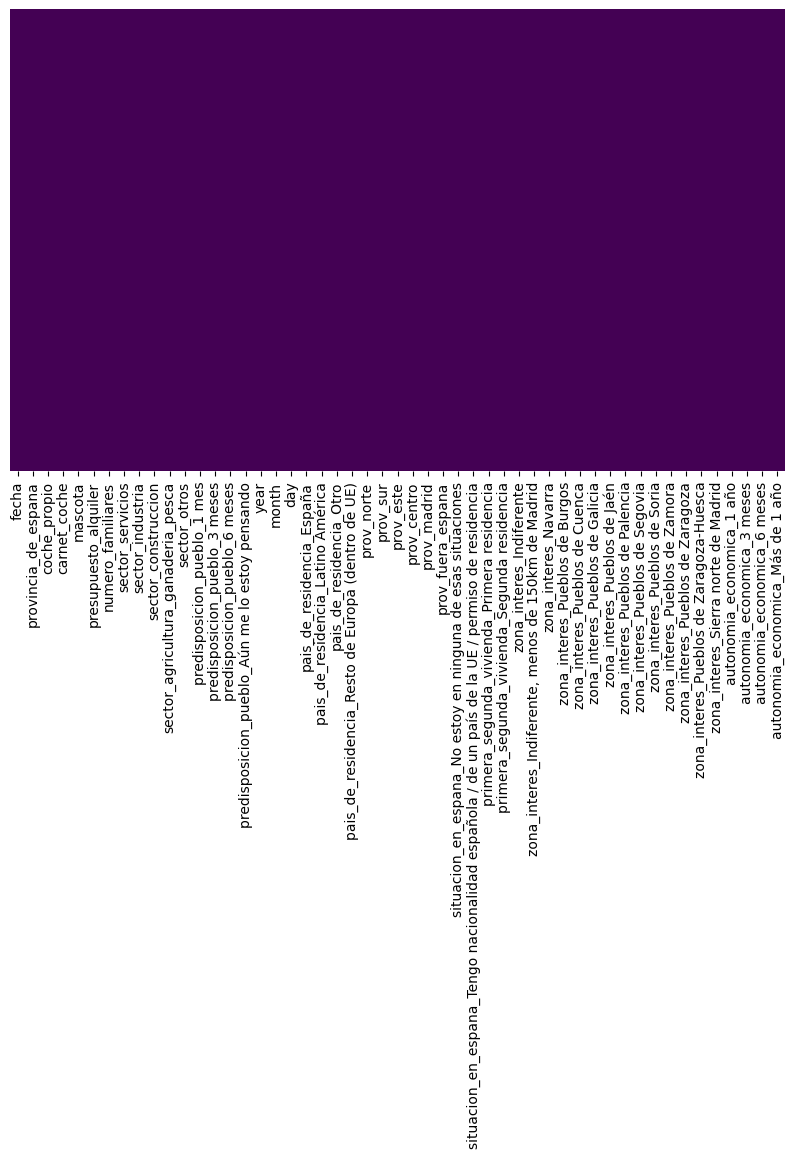

In [43]:
plt.figure(figsize=(10, 6))  

sns.heatmap(data_prior3.isna(),   
            yticklabels=False,
            cmap='viridis',
            cbar=False
           )

plt.show();

In [44]:
data_prior3 = data_prior3.drop(labels=['provincia_de_espana'],axis=1)

In [46]:
data_prior3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10449 entries, 1 to 10617
Data columns (total 50 columns):
 #   Column                                                                                         Non-Null Count  Dtype         
---  ------                                                                                         --------------  -----         
 0   fecha                                                                                          10449 non-null  datetime64[ns]
 1   coche_propio                                                                                   10449 non-null  int32         
 2   carnet_coche                                                                                   10449 non-null  int32         
 3   mascota                                                                                        10449 non-null  int32         
 4   presupuesto_alquiler                                                                           10449

In [45]:
data_prior3.to_csv('../Proyecto_Arraigo_Recomender_System/data/Urbanitas_num_clean.csv')